Please upload the LoanApprovalPrediction.csv file.


Saving Loan Prediction Data.csv to Loan Prediction Data.csv


/tmp/ipython-input-3-2815757936.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
/tmp/ipython-input-3-2815757936.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

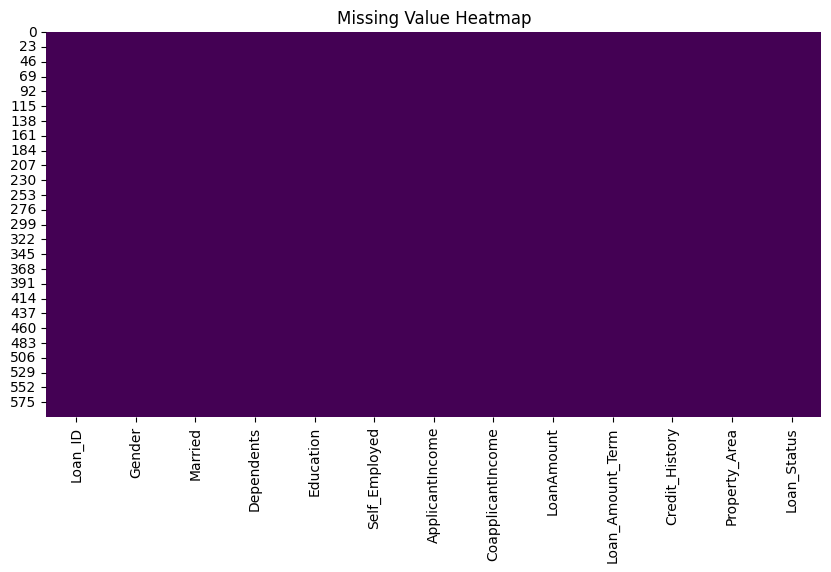

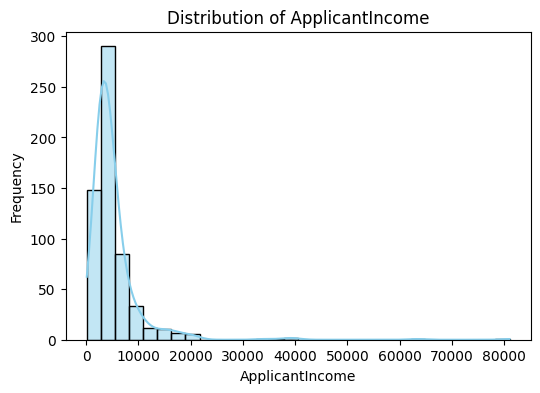

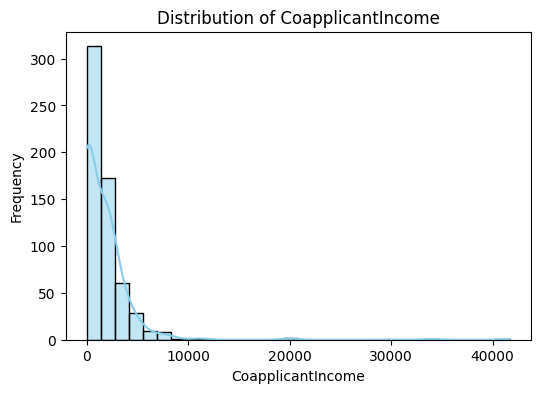

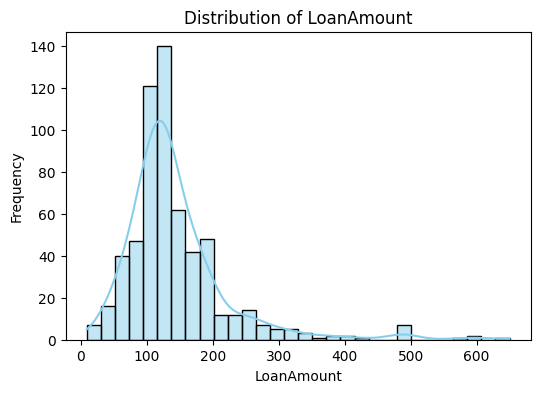

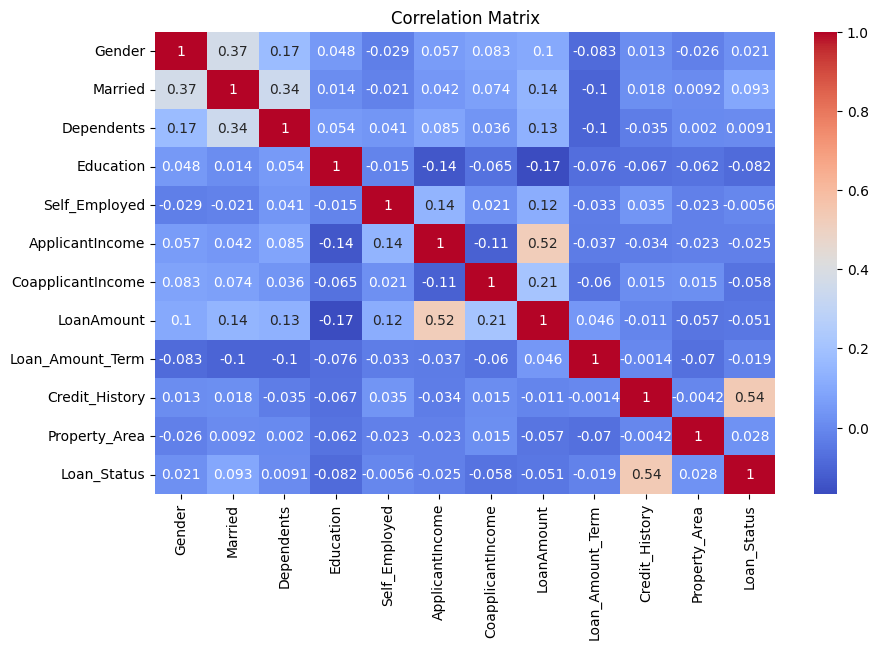

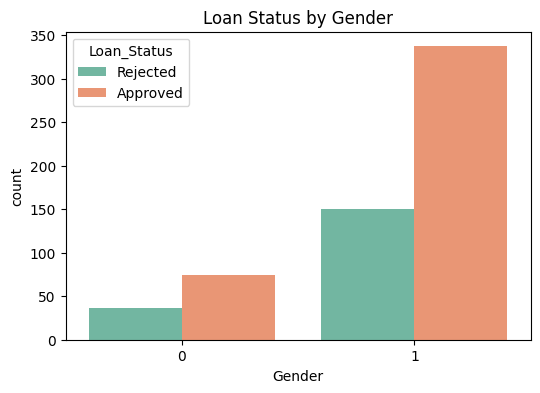

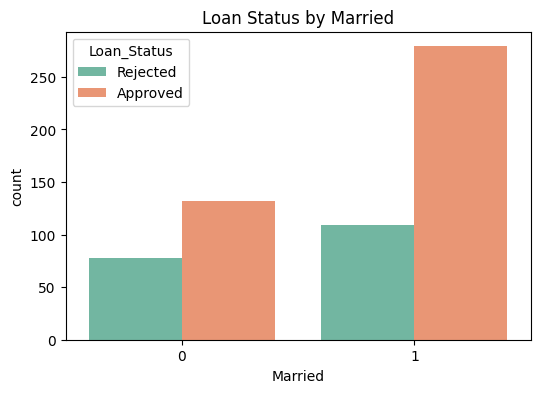

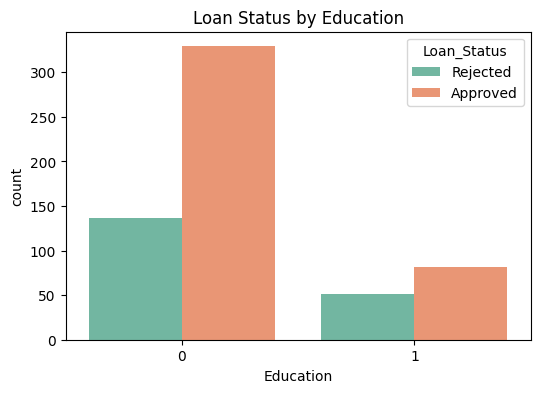

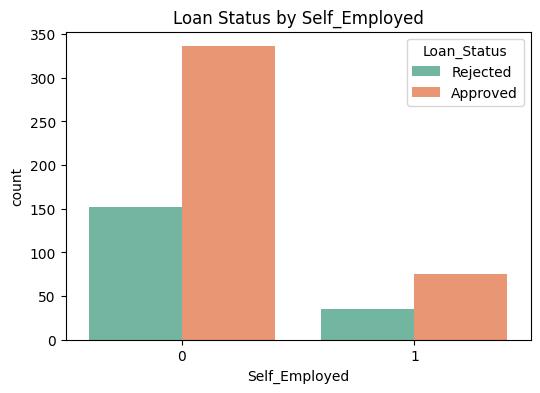

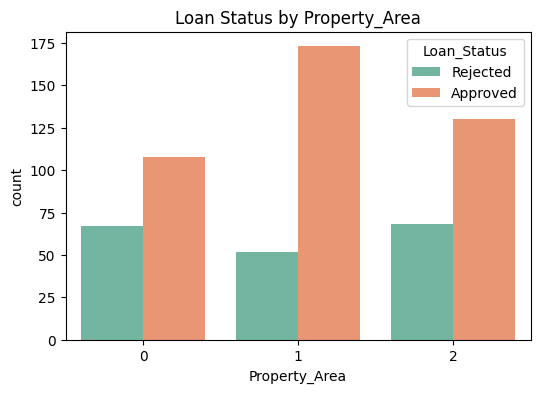

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.46      0.59        35
           1       0.81      0.96      0.88        85

    accuracy                           0.82       120
   macro avg       0.83      0.71      0.74       120
weighted avg       0.82      0.82      0.80       120



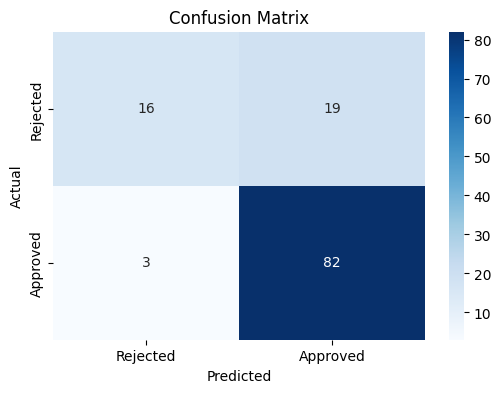

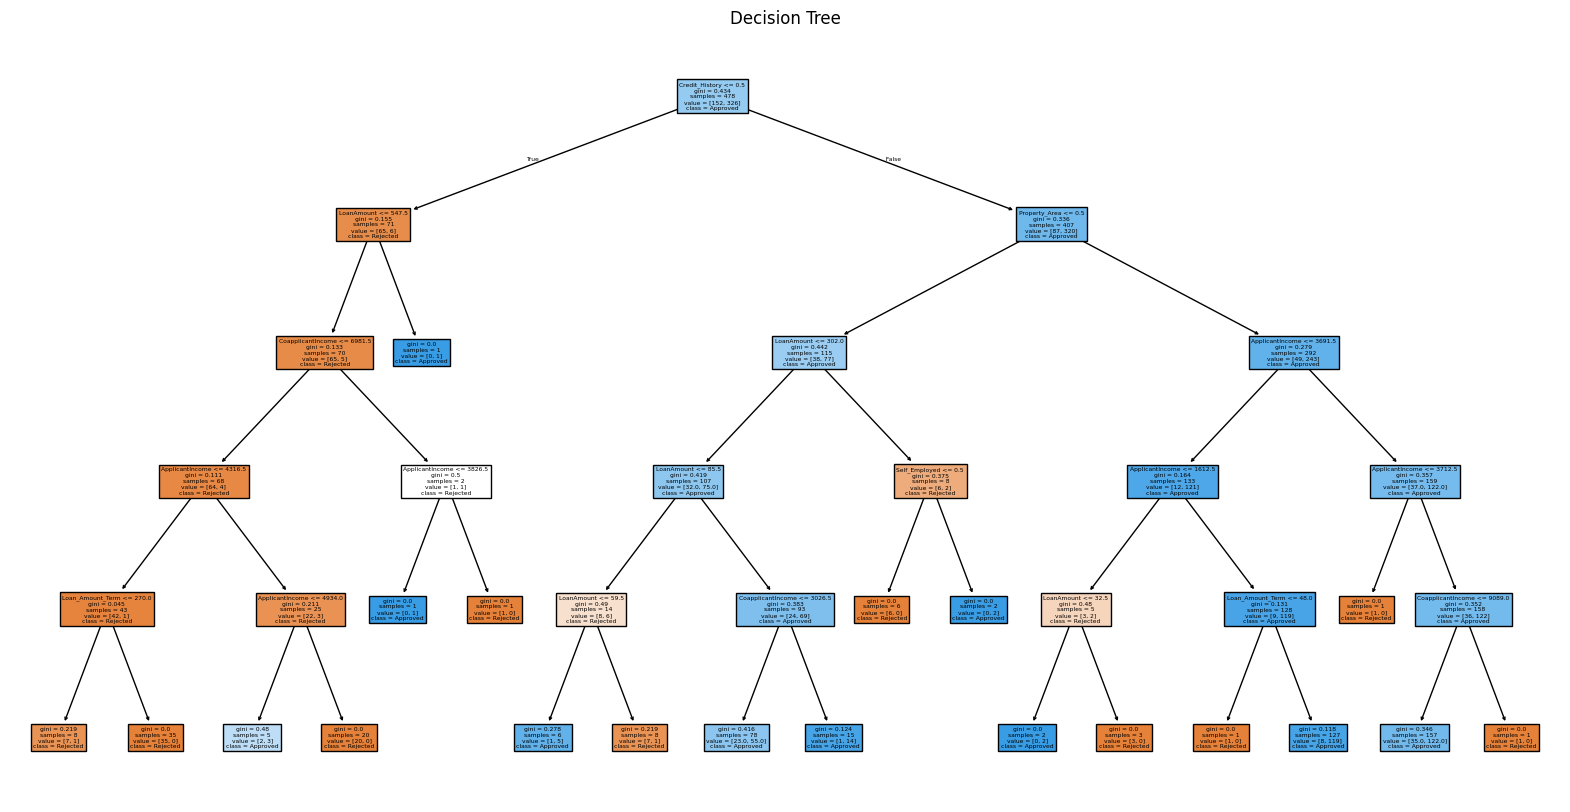

/tmp/ipython-input-3-2815757936.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.values, y=importance.index, palette='viridis')


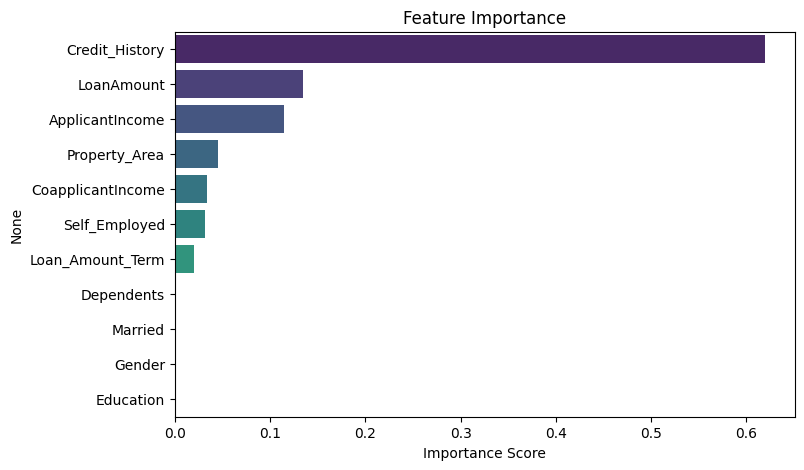


📋 Loan Prediction for New Applicant: Approved


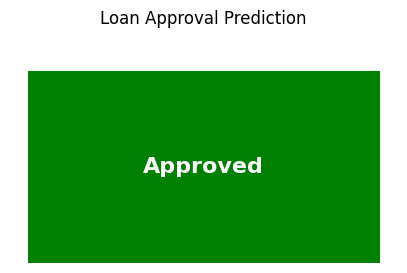

In [3]:
# ==============================
# LOAN APPROVAL PREDICTION PROJECT
# ==============================

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from google.colab import files

# Step 1: Upload the CSV file
print("Please upload the LoanApprovalPrediction.csv file.")
uploaded = files.upload()

# Step 2: Load the dataset
data = pd.read_csv('LoanApprovalPrediction.csv')

# Step 3: Data Preprocessing
# Convert to numeric where needed
data['LoanAmount'] = pd.to_numeric(data['LoanAmount'], errors='coerce')
data['Loan_Amount_Term'] = pd.to_numeric(data['Loan_Amount_Term'], errors='coerce')
data['Credit_History'] = pd.to_numeric(data['Credit_History'], errors='coerce')

# Handle missing numerical values
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

# Handle missing categorical values
for col in ['Gender', 'Married', 'Self_Employed', 'Dependents']:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Convert '3+' in Dependents and cast to int
data['Dependents'] = data['Dependents'].replace('3+', '3')
data['Dependents'] = pd.to_numeric(data['Dependents'], errors='coerce')

# Encode categorical variables
label_enc_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in label_enc_cols:
    data[col] = le.fit_transform(data[col])

# ==============================
# VISUALIZATION
# ==============================

# Heatmap for missing values
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

# Distribution plots
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Correlation Heatmap - drop non-numeric columns like Loan_ID
numeric_data = data.drop(columns=['Loan_ID'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Bar plots for categorical features
cat_plot_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
for col in cat_plot_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Loan_Status', data=data, palette='Set2')
    plt.title(f'Loan Status by {col}')
    plt.legend(title='Loan_Status', labels=['Rejected', 'Approved'])
    plt.show()

# ==============================
# MODEL TRAINING
# ==============================

# Define features and label
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = data['Loan_Status']

# Handle any remaining NaNs (if any)
X.fillna(0, inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Visualize Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(model, feature_names=X.columns, class_names=['Rejected', 'Approved'], filled=True)
plt.title("Decision Tree")
plt.show()

# Feature Importance
importance = pd.Series(model.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=importance.values, y=importance.index, palette='viridis')
plt.title('Feature Importance')
plt.xlabel("Importance Score")
plt.show()

# ==============================
# PREDICT FOR NEW APPLICANT (VISUALIZED)
# ==============================

# New applicant input (encoded values must match training)
new_applicant = pd.DataFrame([{
    'Gender': 1,               # Male
    'Married': 1,              # Yes
    'Dependents': 1,           # 1 dependent
    'Education': 0,            # Graduate
    'Self_Employed': 0,        # No
    'ApplicantIncome': 4000,
    'CoapplicantIncome': 1500,
    'LoanAmount': 128,
    'Loan_Amount_Term': 360,
    'Credit_History': 1.0,
    'Property_Area': 2         # Urban
}])

# Predict loan approval
prediction = model.predict(new_applicant)[0]
result = 'Approved' if prediction == 1 else 'Rejected'
color = 'green' if prediction == 1 else 'red'

# Print result
print("\n📋 Loan Prediction for New Applicant:", result)

# Visualize the prediction
plt.figure(figsize=(5, 3))
plt.bar(['Loan Status'], [1], color=color)
plt.text(0, 0.5, result, fontsize=16, color='white', weight='bold', ha='center', va='center')
plt.ylim(0, 1.2)
plt.title("Loan Approval Prediction")
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.show()
